## Chapter 5
### Support Vector Machine

In [15]:
! pip install tensorflow scikit-learn pandas numpy scikit-learn-intelex 

In [16]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


----

##### Linear SVM Classification

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [18]:
iris= datasets.load_iris()
X_iris= iris["data"][:,(2,3)]
y_iris= (iris["target"]==2).astype(np.float64)

svm_clf= Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X_iris,y_iris)

,steps,"[('scalar', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [19]:
svm_clf.predict([[5.5,1.7]])

array([1.])

----
Non Linear SVM Classification

In [20]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X_moons,y_moons = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf= Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))    
])

polynomial_svm_clf.fit(X_moons,y_moons)

,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [22]:
polynomial_svm_clf.predict([[5.5,1.7]])

array([1])

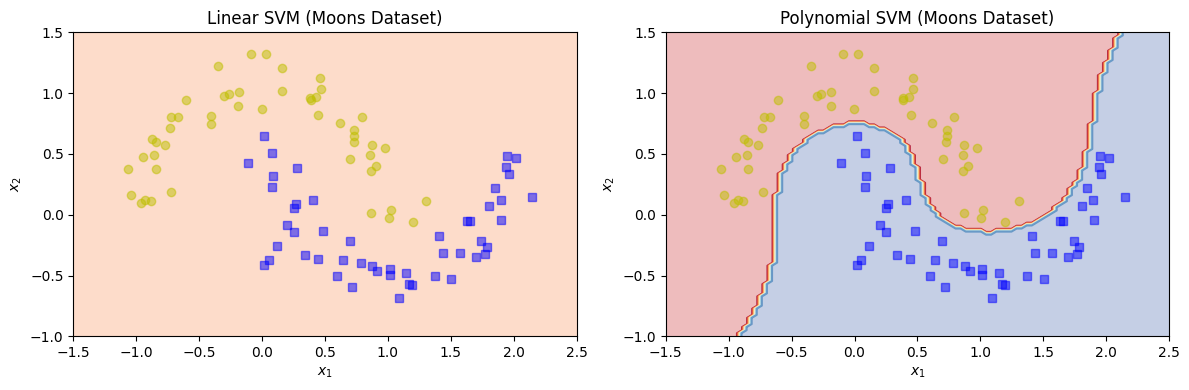

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = plt.cm.RdYlBu
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = plt.cm.RdYlBu
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

# Plot the decision boundary for polynomial SVM
plt.figure(figsize=(12, 4))

# Plot original data with linear SVM
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_clf, X_moons, y_moons)
plt.title("Linear SVM (Moons Dataset)")

# Plot moon dataset with polynomial SVM
plt.subplot(1, 2, 2)
plot_decision_boundary(polynomial_svm_clf, X_moons, y_moons)
plt.title("Polynomial SVM (Moons Dataset)")

plt.tight_layout()
plt.show()

----
Gaussian RBF Kernel

In [24]:
from sklearn.svm import SVC


rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X_iris, y_iris)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


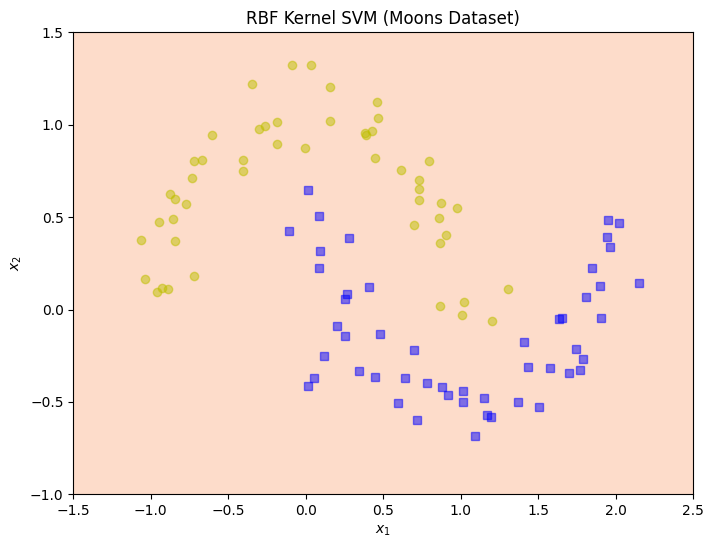

In [27]:
# Draw plot
plt.figure(figsize=(8, 6))
plot_decision_boundary(rbf_kernel_svm_clf, X_moons, y_moons)
plt.title("RBF Kernel SVM (Moons Dataset)")
plt.show()

---- 
SVM Regression

In [29]:
from sklearn.svm import LinearSVR

svm_reg= LinearSVR(epsilon=1.5)
svm_reg.fit(X_iris,y_iris)

,epsilon,1.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'
,fit_intercept,True
,intercept_scaling,1.0
,dual,'auto'
,verbose,0
,random_state,None
,max_iter,1000


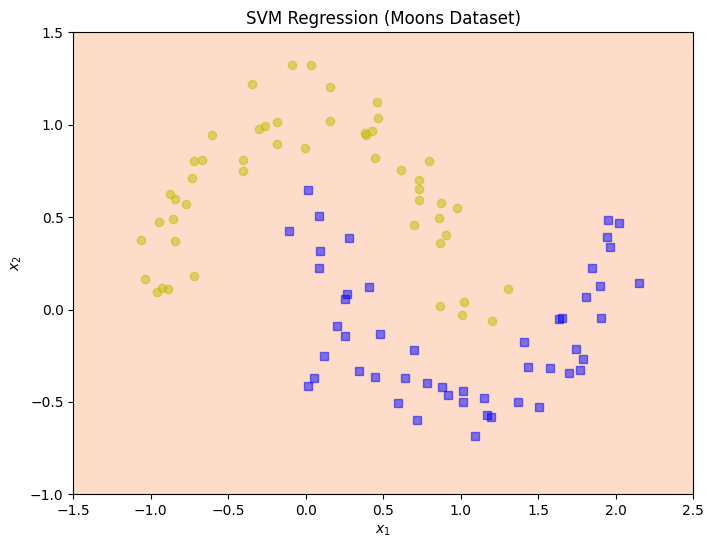

In [31]:
# Plot SVM Regression
plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_reg, X_moons, y_moons)
plt.title("SVM Regression (Moons Dataset)")
plt.show()